In [34]:
import sys; sys.path.append("../")
from spatial_regression import LaggedSpatialRegression
import torch
import numpy as np
import matplotlib.pyplot as plt

In [35]:
what = "no_seasonal"
model = torch.load(f"../outputs/weights_{what}_log_bias.pt")
data = np.load(f"../data/simulation/{what}.npz")

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/weights_no_seasonal_log_bias.pt'

In [36]:
mu, gam, lam = model.get_pars()

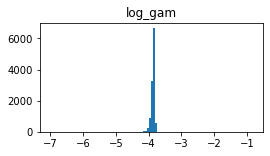

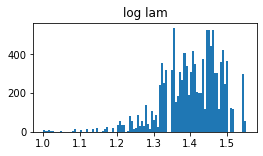

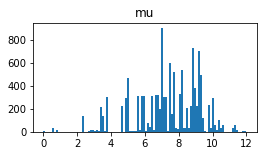

In [37]:
plt.figure(figsize=((4, 2)))
plt.hist(gam.detach().log().numpy().flatten(), bins=100)
plt.title("log_gam")
plt.show()

plt.figure(figsize=((4, 2)))
plt.hist(lam.detach().numpy().flatten(), bins=100)
plt.title("log lam")
plt.show()

plt.figure(figsize=((4, 2)))
plt.hist(mu.detach().numpy().flatten(), bins=100)
plt.title("mu")
plt.show()


In [38]:
locs = data["locs"]
sigs = data["sigs"]
list(zip(locs.tolist(), sigs.round(2)))

[([25, 30], 0.11), ([25, 50], 0.3), ([25, 70], 0.12)]

Let's pick a power plant in the middle

In [39]:
p = 0
locp = locs[p]

In [40]:
mu_p = mu[:, :, p].detach().numpy()
gam_p = gam[:, :, p].detach().numpy()
lam_p = lam[:, :, p].detach().numpy()
# alpha_p = model.alpha[p].detach().numpy()

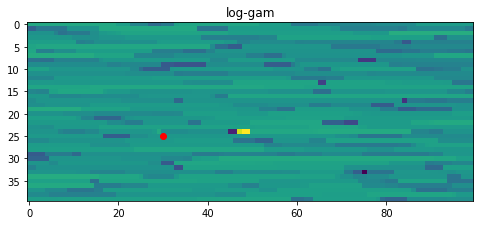

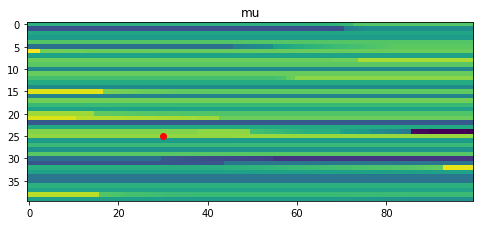

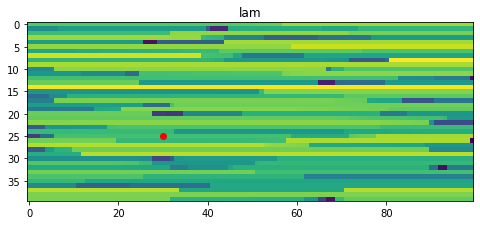

In [41]:
plt.figure(figsize=((8, 4)))
plt.imshow(np.log(gam_p))
plt.scatter([locp[1]], [locp[0]], c="red")
plt.title("log-gam")
plt.show()

plt.figure(figsize=((8, 4)))
plt.imshow(mu_p)
plt.scatter([locp[1]], [locp[0]], c="red")
plt.title("mu")
plt.show()

plt.figure(figsize=((8, 4)))
plt.imshow(lam_p)
plt.scatter([locp[1]], [locp[0]], c="red")
plt.title("lam")
plt.show()

# plt.figure(figsize=((8, 4)))
# plt.imshow(alpha_p)
# plt.scatter([locp[1]], [locp[0]], c="red")
# plt.title("alpha")
# plt.show()